In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
print('pandas', pd.__version__)
print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)

pandas 0.22.0
matplotlib 2.2.2
numpy 1.14.1


Read the data

In [2]:
with open('../data/kddcup.names.txt', 'r') as properties_file:
        lines = properties_file.readlines()[1:]
        properties = [lines[i].split(':')[0] for i in range(len(lines))]
        properties.append('attack_type')
properties
%store properties

Stored 'properties' (list)


In [3]:
print(properties)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type']


In [4]:
data = pd.read_csv("../data/kddcup.data_10_percent_corrected", names=properties, nrows=100000)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


Data types

In [5]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Set object to category

In [6]:
for properti in ['protocol_type', 'service', 'flag', 'attack_type']:
    data[properti] = data[properti].astype('category')
data.dtypes

duration                          int64
protocol_type                  category
service                        category
flag                           category
src_bytes                         int64
dst_bytes                         int64
land                              int64
wrong_fragment                    int64
urgent                            int64
hot                               int64
num_failed_logins                 int64
logged_in                         int64
num_compromised                   int64
root_shell                        int64
su_attempted                      int64
num_root                          int64
num_file_creations                int64
num_shells                        int64
num_access_files                  int64
num_outbound_cmds                 int64
is_host_login                     int64
is_guest_login                    int64
count                             int64
srv_count                         int64
serror_rate                     float64


Set category type to numerical except for attack_type

In [7]:
for properti in ['protocol_type', 'service', 'flag']:
    data[properti] = data[properti].cat.codes
data.dtypes

duration                          int64
protocol_type                      int8
service                            int8
flag                               int8
src_bytes                         int64
dst_bytes                         int64
land                              int64
wrong_fragment                    int64
urgent                            int64
hot                               int64
num_failed_logins                 int64
logged_in                         int64
num_compromised                   int64
root_shell                        int64
su_attempted                      int64
num_root                          int64
num_file_creations                int64
num_shells                        int64
num_access_files                  int64
num_outbound_cmds                 int64
is_host_login                     int64
is_guest_login                    int64
count                             int64
srv_count                         int64
serror_rate                     float64


Find attack categories

In [8]:
attack_categories = sorted(list(set(data.attack_type)))
attack_categories

['back.',
 'buffer_overflow.',
 'ftp_write.',
 'guess_passwd.',
 'imap.',
 'ipsweep.',
 'land.',
 'loadmodule.',
 'multihop.',
 'neptune.',
 'nmap.',
 'normal.',
 'perl.',
 'phf.',
 'pod.',
 'portsweep.',
 'satan.',
 'smurf.',
 'teardrop.',
 'warezmaster.']

In [9]:
len(attack_categories)

20

In [10]:
# datasets = {}
# category = 'normal.'
# datasets[category] = data[data['attack_type'] == category]
# datasets['normal.'].head()

get datasets per category

In [11]:
datasets = {}
for category in attack_categories:
    datasets[category] = data[data['attack_type'] == category]
len(datasets) # should be same as len(attack_categories)

20

{'perl.': 0.002, 'ipsweep.': 0.76, 'smurf.': 19.104, 'phf.': 0.003, 'pod.': 0.04, 'portsweep.': 0.278, 'buffer_overflow.': 0.005, 'satan.': 0.539, 'normal.': 56.237, 'imap.': 0.012, 'back.': 2.002, 'neptune.': 20.482, 'warezmaster.': 0.02, 'loadmodule.': 0.002, 'ftp_write.': 0.008, 'teardrop.': 0.199, 'land.': 0.017, 'guess_passwd.': 0.053, 'multihop.': 0.006, 'nmap.': 0.231}


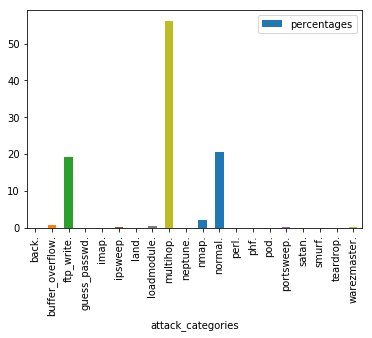

In [12]:
# The percentage of data for each attack category
category_percentages = {}
for category in attack_categories:
    category_percentages[category] = round((len(datasets[category]) / len(data))*100, 3)
#     print(category, ': ', percentages[category], ' %')
percentages = list(category_percentages.values())
df_percentages = pd.DataFrame({'attack_categories': attack_categories, 'percentages': percentages})
df_percentages.plot.bar(x='attack_categories', y='percentages')
print(category_percentages)
plt.show()


In [13]:
datasets['back.'].head(2)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
39723,0,1,22,9,54540,8314,0,0,0,2,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,back.
39724,0,1,22,9,54540,8314,0,0,0,2,...,2,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,back.


In [14]:
%store datasets

Stored 'datasets' (dict)


In [15]:
# data[:][data['attack_type'] == 'back.'].head()
normal = data[:]

attacks = normal['attack_type'].tolist()
attacks = [[1, 0] if attacks[i] == 'normal.' else [0, 1] for i in range(len(attacks))]
normal['attack_type'] = pd.Series(attacks)
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,"[1, 0]"
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,"[1, 0]"
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,"[1, 0]"
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,"[1, 0]"
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,"[1, 0]"


In [16]:
normal['attack_type'].shape

(100000,)

In [18]:
# Test if normal data is well formed eventually
print("Normal")
print(normal['attack_type'].head())
print("Abnormal")
i = 0
for a in normal['attack_type']:
    if a == [0, 1]:
        i+=1
        print(a)
        if i >=5:
            break


Normal
0    [1, 0]
1    [1, 0]
2    [1, 0]
3    [1, 0]
4    [1, 0]
Name: attack_type, dtype: object
Abnormal
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


Shuffle data

In [19]:
# normal = normal.sample(frac=1)

In [20]:
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,"[1, 0]"
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,"[1, 0]"
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,"[1, 0]"
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,"[1, 0]"
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,"[1, 0]"


In [21]:
%store normal

Stored 'normal' (DataFrame)


<a id='another_cell'></a>